## Value at Risk (VAR)

In general, the Value at Risk (VAR) measures the potential return in value of a risky asset or portfolio during a time period. It has three components: a time period, the probablity (of a return smaller than or equal to the specified return) and a return amount (or return percentage)

![alt text](/content/VaR_diagram.png)

VAR is used most often by commercial and investment banks to capture the potential loss of their traded portfolios over a specified period. The first regulatory measures that evoke Value at Risk (VAR) were initiated in 1980, when the SEC tied the capital requirements of financial service firms to the losses that would be incurred, with 95% confidence over a thirty-day interval, in different security classes; historical returns were used to compute these potential losses.

In 1995, J.P. Morgan provided public access to data on the variances of and covariances across various security and asset classes, that it had used internally for almost a decade to manage risk, and allowed software makers to develop software to measure risk.

There are numerous approaches used to compute Value at Risk. The measure can be computed by investigating the return distritutions for market risks, and by using the variances in and covariances across these risks. It can also be estimated by running Monte Calo simulations through historical data. In this study we are going to discuss the two methonds below:

## Historical method
## Variance method

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 
from pandas_datareader import data, wb
import datetime
import numpy
import seaborn as sns
sns.set(style="darkgrid", context="poster")

# Extract data from web

Let's extract the stock price of TELSA from 1 Jan 2016 to 1 Jan 2017 in only 3 lines.
We will use yahoo as google finance has stoped working

In [0]:
# set start and end date
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2020, 2, 5)
f = data.DataReader("TSLA", "yahoo", start, end)

# "TSLA" --> stock name
# "yahoo" --> server name
# start --> start date
# end --> end date

In [35]:
f

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,231.380005,219.000000,230.720001,223.410004,6827100,223.410004
2016-01-05,226.889999,220.000000,226.360001,223.429993,3186800,223.429993
2016-01-06,220.050003,215.979996,220.000000,219.039993,3779100,219.039993
2016-01-07,218.440002,213.669998,214.190002,215.649994,3554300,215.649994
2016-01-08,220.440002,210.770004,217.860001,211.000000,3628100,211.000000
...,...,...,...,...,...,...
2020-01-30,650.880005,618.000000,632.419983,640.809998,29005700,640.809998
2020-01-31,653.000000,632.520020,640.000000,650.570007,15719300,650.570007
2020-02-03,786.140015,673.520020,673.690002,780.000000,47233500,780.000000


In [36]:
# select one column
f['Close']

Date
2016-01-04    223.410004
2016-01-05    223.429993
2016-01-06    219.039993
2016-01-07    215.649994
2016-01-08    211.000000
                 ...    
2020-01-30    640.809998
2020-01-31    650.570007
2020-02-03    780.000000
2020-02-04    887.059998
2020-02-05    734.700012
Name: Close, Length: 1030, dtype: float64

## Make Chart

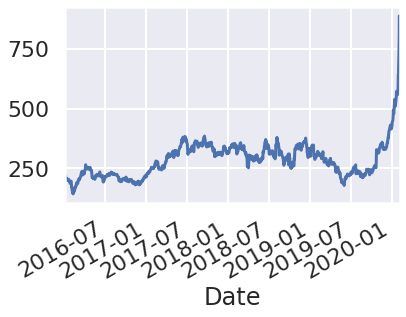

In [37]:
f['Close'].plot()


## Select multiple columns¶


In [38]:
f[['High', 'Low']]


,High,Low
Date,,
2016-01-04,231.380005,219.000000
2016-01-05,226.889999,220.000000
2016-01-06,220.050003,215.979996
2016-01-07,218.440002,213.669998
2016-01-08,220.440002,210.770004
...,...,...
2020-01-30,650.880005,618.000000
2020-01-31,653.000000,632.520020
2020-02-03,786.140015,673.520020


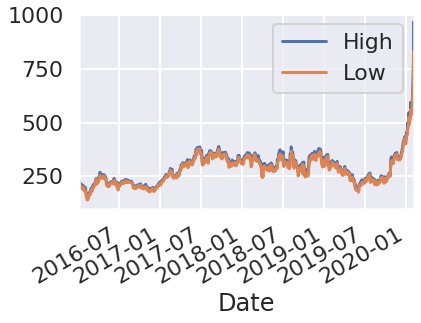

In [39]:
# make a plot
f[['High', 'Low']].plot()

## Calculate return¶


In [40]:
f

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,231.380005,219.000000,230.720001,223.410004,6827100,223.410004
2016-01-05,226.889999,220.000000,226.360001,223.429993,3186800,223.429993
2016-01-06,220.050003,215.979996,220.000000,219.039993,3779100,219.039993
2016-01-07,218.440002,213.669998,214.190002,215.649994,3554300,215.649994
2016-01-08,220.440002,210.770004,217.860001,211.000000,3628100,211.000000
...,...,...,...,...,...,...
2020-01-30,650.880005,618.000000,632.419983,640.809998,29005700,640.809998
2020-01-31,653.000000,632.520020,640.000000,650.570007,15719300,650.570007
2020-02-03,786.140015,673.520020,673.690002,780.000000,47233500,780.000000


In [0]:
# shift column by 1 unit
f['Close_2'] = f['Close'].shift(1)

In [42]:
f

,High,Low,Open,Close,Volume,Adj Close,Close_2
Date,,,,,,,
2016-01-04,231.380005,219.000000,230.720001,223.410004,6827100,223.410004,NaN
2016-01-05,226.889999,220.000000,226.360001,223.429993,3186800,223.429993,223.410004
2016-01-06,220.050003,215.979996,220.000000,219.039993,3779100,219.039993,223.429993
2016-01-07,218.440002,213.669998,214.190002,215.649994,3554300,215.649994,219.039993
2016-01-08,220.440002,210.770004,217.860001,211.000000,3628100,211.000000,215.649994
...,...,...,...,...,...,...,...
2020-01-30,650.880005,618.000000,632.419983,640.809998,29005700,640.809998,580.989990
2020-01-31,653.000000,632.520020,640.000000,650.570007,15719300,650.570007,640.809998
2020-02-03,786.140015,673.520020,673.690002,780.000000,47233500,780.000000,650.570007


In [0]:
# drop invalid rows
f = f.drop(f.index[0])

In [44]:
f

,High,Low,Open,Close,Volume,Adj Close,Close_2
Date,,,,,,,
2016-01-05,226.889999,220.000000,226.360001,223.429993,3186800,223.429993,223.410004
2016-01-06,220.050003,215.979996,220.000000,219.039993,3779100,219.039993,223.429993
2016-01-07,218.440002,213.669998,214.190002,215.649994,3554300,215.649994,219.039993
2016-01-08,220.440002,210.770004,217.860001,211.000000,3628100,211.000000,215.649994
2016-01-11,214.449997,203.000000,214.009995,207.850006,4091400,207.850006,211.000000
...,...,...,...,...,...,...,...
2020-01-30,650.880005,618.000000,632.419983,640.809998,29005700,640.809998,580.989990
2020-01-31,653.000000,632.520020,640.000000,650.570007,15719300,650.570007,640.809998
2020-02-03,786.140015,673.520020,673.690002,780.000000,47233500,780.000000,650.570007


In [0]:
# calculate return
f['Return'] = (f['Close'] - f['Close_2'])/f['Close_2']

In [46]:
f

,High,Low,Open,Close,Volume,Adj Close,Close_2,Return
Date,,,,,,,,
2016-01-05,226.889999,220.000000,226.360001,223.429993,3186800,223.429993,223.410004,0.000089
2016-01-06,220.050003,215.979996,220.000000,219.039993,3779100,219.039993,223.429993,-0.019648
2016-01-07,218.440002,213.669998,214.190002,215.649994,3554300,215.649994,219.039993,-0.015477
2016-01-08,220.440002,210.770004,217.860001,211.000000,3628100,211.000000,215.649994,-0.021563
2016-01-11,214.449997,203.000000,214.009995,207.850006,4091400,207.850006,211.000000,-0.014929
...,...,...,...,...,...,...,...,...
2020-01-30,650.880005,618.000000,632.419983,640.809998,29005700,640.809998,580.989990,0.102962
2020-01-31,653.000000,632.520020,640.000000,650.570007,15719300,650.570007,640.809998,0.015231
2020-02-03,786.140015,673.520020,673.690002,780.000000,47233500,780.000000,650.570007,0.198949


The plot() function will return the plot of given series, whereas hist() will give a histogram.


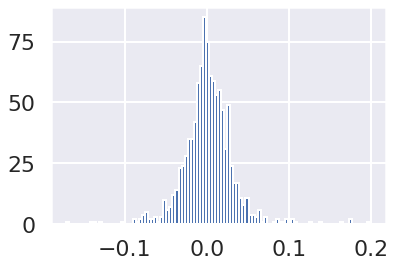

In [47]:
f['Return'].hist(bins=100) #use parameter to define number of bins


## VAR calculated from historical method

The historical method of estimating VAR is based on the actual periodic changes in the risk factors over a lookback period. By ordering return values from the most negative to most positive, we can find the lowest 5% of daily returns (since the returns are ordered from left to right, the worst are always the "left tail").

**numpy.percentile** computes the qth percentile of the data along the specified axis.


In [48]:
numpy.percentile(f['Return'], 5)


-0.04208452338277235

# VAR calculated from variance
The second methond we are going to use is the variance methond. Often we assume that the risk factors are distributed normally. Assuming normally allows us to estimate the risk based only on means and variances.
For a given stock, if the return is normally distributed with mean $\mu$ and standard deviation $\sigma$ (square root of variance), the VAR can be obtained as below:

$$VAR = \mu - \alpha * \sigma$$
where $\alpha$ is determined by confidence level:
* c = 95%, $\alpha$ = 1.65
**bold text**
numpy.mean() computes the mean value of a series, **numpy.std()** computes the standard deviation of a series.

In [49]:
numpy.mean(f['Return']) - 1.65*numpy.std(f['Return'])


-0.04916212472080247